# CLUSTERING OF COUNTRIES

#### PROBLEM STATEMENT:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

The job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 


### Step 1: Reading and Understanding the Data   


In [907]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [908]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [909]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [1175]:
# Read the given CSV file, and view some sample records
df = pd.read_csv(r"C:\Vydehi School\upgrad\COURSE 2(MACHINE LEARNING I)\ASSIGNMENT-CLUSTERING & PCA (M-6)\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [1176]:
# Before manipulating data, we will save one copy of orignal data.
data = df.copy()
#data.head()

In [1177]:
#Dimensions of a data frame
df.shape

(167, 10)

In [1178]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [1179]:
# Get a summary of the dataframe using 'describe()'
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2: Data Cleaning and Preparation

In [1180]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [1181]:
# Dropping duplicates if any
df = df.drop_duplicates()

### Step 3: Data Visualisation

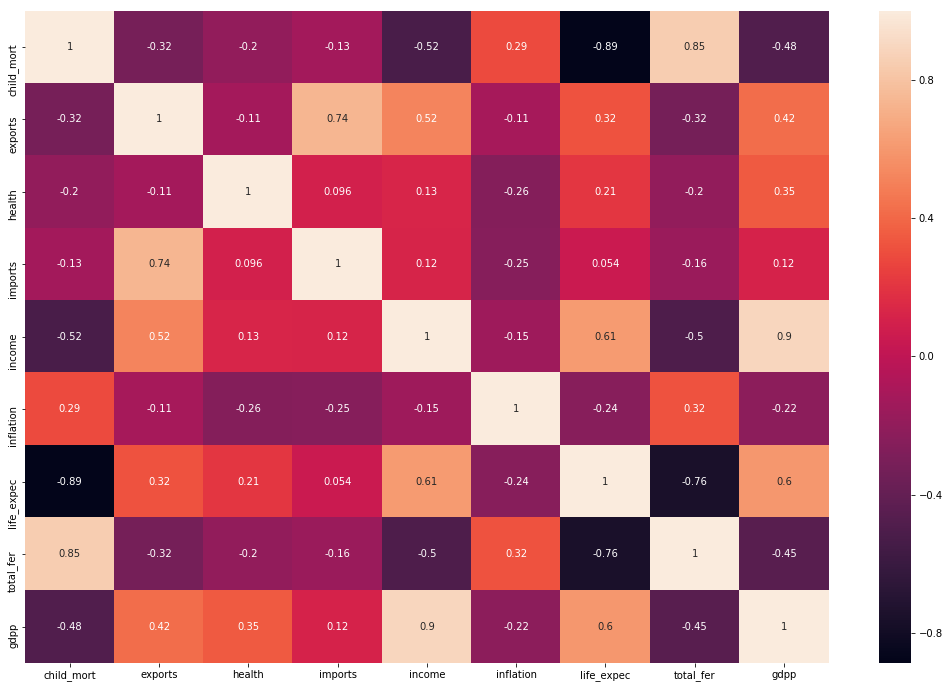

In [1182]:
#to see the correlation among variables using correlation matrix

# figure size
plt.figure(figsize=(18,12))

# heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()


#### Inferences:

1) There is high positive correlation between income and gdpp, total_fer and child_mort,imports and exports

2) There is a high negative correlation between life_expec and child_mort, life_expec and total_fer

3) PCA can be used to solve above problem

## Outlier Analysis

In [1183]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


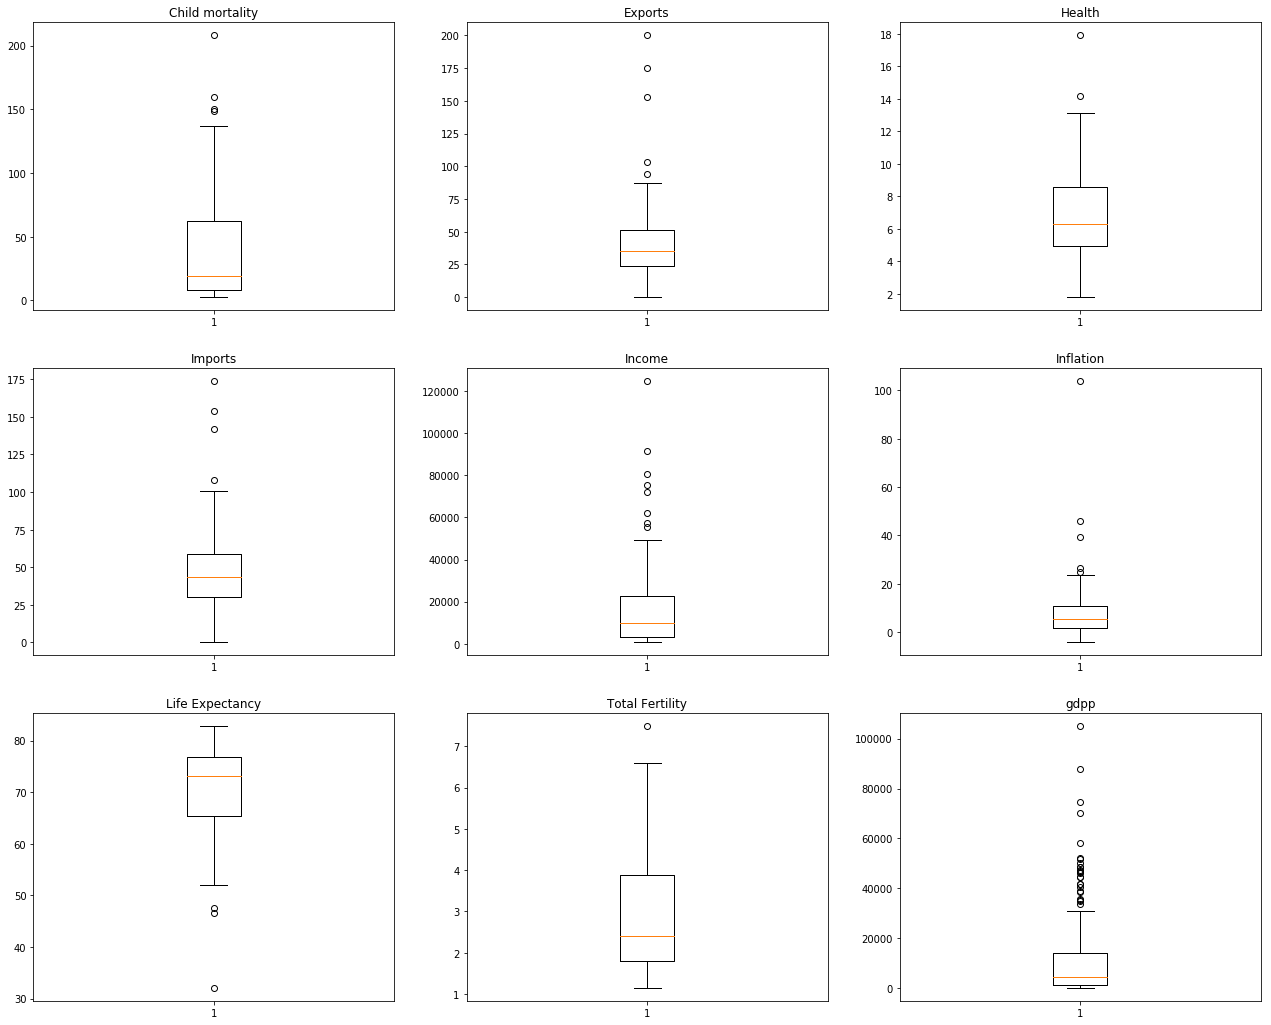

In [1184]:
#Plotting of Outliers
plt.figure(figsize=(22,18))

plt.subplot(3,3,1)
plt.title('Child mortality')
plt.boxplot(df['child_mort'])
plt.subplot(3,3,2)
plt.title('Exports')
plt.boxplot(df['exports'])
plt.subplot(3,3,3)
plt.title('Health')
plt.boxplot(df['health'])
plt.subplot(3,3,4)
plt.title('Imports')
plt.boxplot(df['imports'])
plt.subplot(3,3,5)
plt.title('Income')
plt.boxplot(df['income'])
plt.subplot(3,3,6)
plt.title('Inflation')
plt.boxplot(df['inflation'])
plt.subplot(3,3,7)
plt.title('Life Expectancy')
plt.boxplot(df['life_expec'])
plt.subplot(3,3,8)
plt.title('Total Fertility')
plt.boxplot(df['total_fer'])
plt.subplot(3,3,9)
plt.title('gdpp')
plt.boxplot(df['gdpp'])

plt.show()

### Inference:

It can be observed from above plots that there are number of outliers present for imports, exports, income and gdpp

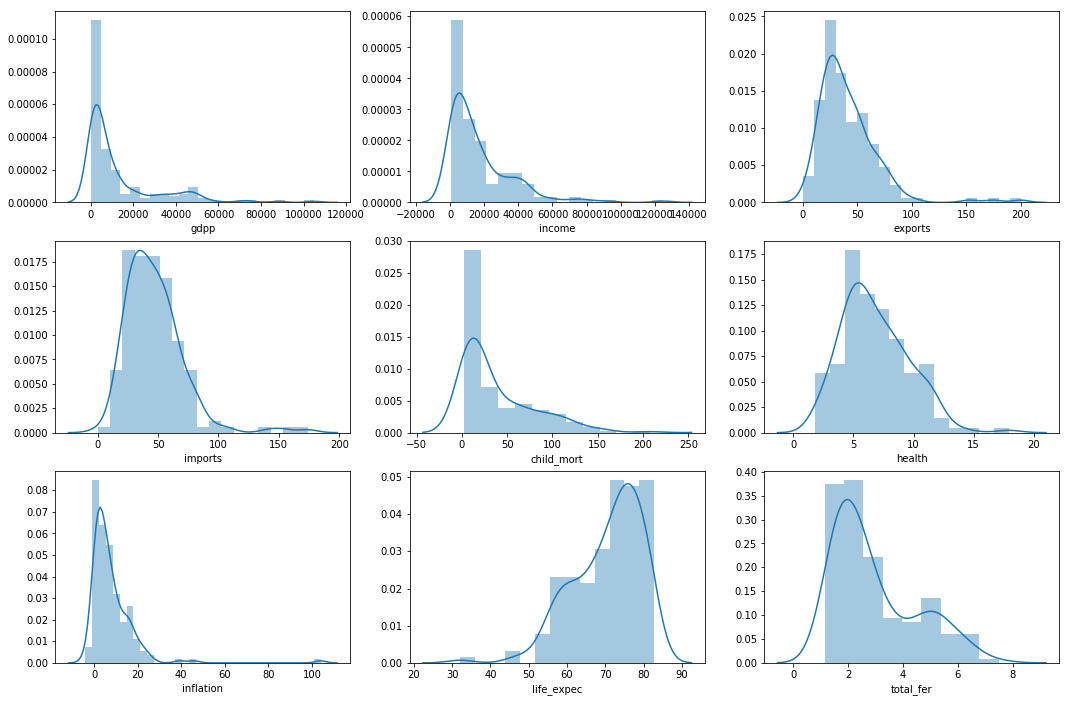

In [1185]:
plt.figure(figsize=(18,12))

plt.subplot(3,3,1)
sns.distplot(df["gdpp"])
plt.subplot(3,3,2)
sns.distplot(df["income"])
plt.subplot(3,3,3)
sns.distplot(df["exports"])
plt.subplot(3,3,4)
sns.distplot(df["imports"])
plt.subplot(3,3,5)
sns.distplot(df["child_mort"])
plt.subplot(3,3,6)
sns.distplot(df["health"])
plt.subplot(3,3,7)
sns.distplot(df["inflation"])
plt.subplot(3,3,8)
sns.distplot(df["life_expec"])
plt.subplot(3,3,9)
sns.distplot(df["total_fer"])

plt.show()

### Inference:

Number of outliers are present for income,gdpp, child mortality

In [1186]:
def outlier(column):
    Q1 = df[column].quantile(0.05)
    Q3 = df[column].quantile(0.95)
    IQR=Q3-Q1
    
    outlier=df[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
   
    print(outlier["country"].tolist())

In [1187]:
#outliers in exports

print("The following countries has higher exports than other countries")
print("        ")
outlier("exports")

The following countries has higher exports than other countries
        
['Singapore']


In [1188]:
#outliers in income
print("The following countries has higher income than other countries")
print("        ")
outlier("income")

The following countries has higher income than other countries
        
['Qatar']


In [1189]:
#outliers in gdpp

print("The following countries has higher gdp than other countries")
print("        ")
outlier("gdpp")

The following countries has higher gdp than other countries
        
[]


In [1190]:
#outliers in life expectancy

print("The following countries has higher life expectancy than other countries")
print("        ")
outlier("life_expec")

The following countries has higher life expectancy than other countries
        
[]


In [1191]:
#outliers in inflation

print("The following countries has higher inflation than other countries")
print("        ")
outlier("inflation")

The following countries has higher inflation than other countries
        
['Nigeria']


### Inference:

From business point of view there are not much outliers below 5th percentile and above 95th percentile, so we will not remove them

### Rescaling the features

In [1192]:
# instantiate
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# fit_transform
df[varlist] = scaler.fit_transform(df[varlist])
df.shape

(167, 10)

In [1193]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### Step 4: Principal Component Analysis (PCA) on dataset

In [1194]:
from sklearn.decomposition import PCA

In [1195]:
pca = PCA(random_state=42)

In [1196]:
# Putting feature variable to X
X = df.drop(['country'],axis=1)

# Putting response variable to y
y = df['country']

In [1197]:
X.head()
#y.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [1198]:
#Doing the PCA on the dataset
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [1199]:
# Components from PCA
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [1200]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':X.columns })
components

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


In [1201]:
#Looking at the explained variance ratio
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [1202]:
#Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [1203]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([45.95, 63.13, 76.13, 87.18, 94.52, 97.  , 98.26, 99.24, 99.98])

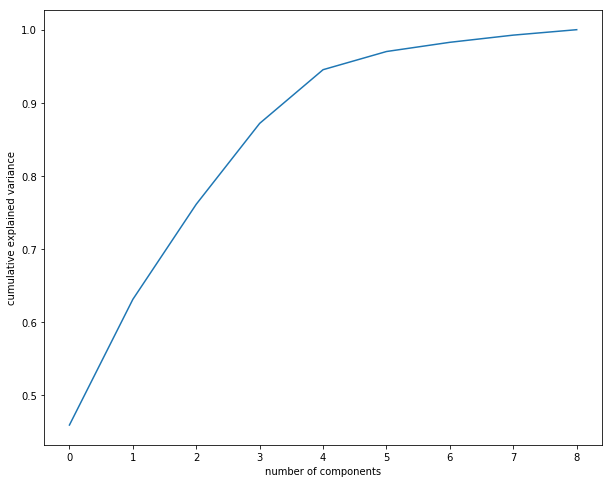

In [1204]:
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###### Inference:

From above plot we can see that 4 components are enough for explaining 95% variation in data set

### Perform PCA with 4 components

In [1205]:
# Using Incremental PCA 

from sklearn.decomposition import IncrementalPCA

In [1206]:
pca_final = IncrementalPCA(n_components=4)

In [1207]:
df_pca = pca_final.fit_transform(X)

In [1208]:
df_pca.shape

(167, 4)

In [1209]:
#Making a dataframe for convenience

df1 = pd.DataFrame(df_pca, columns=["PC1", "PC2","PC3","PC4"])
df1.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [1210]:
# Making a copy of df1
df2=df1.copy()
df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


## Outlier Analysis after PCA

In [1211]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%

df1.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,2.659217e-17,1.429329e-17,-2.476396e-17,1.662011e-17
std,2.039726e+00,1.247144e+00,1.083371e+00,1.000238e+00
min,-4.878925e+00,-2.991196e+00,-5.590269e+00,-1.582161e+00
25%,-1.383574e+00,-7.481349e-01,-4.154744e-01,-7.901529e-01
50%,2.418370e-02,-9.344038e-02,1.937511e-01,-2.939462e-01
75%,1.224232e+00,5.568934e-01,5.140716e-01,7.090722e-01
90%,2.461331e+00,1.276336e+00,1.067970e+00,1.226926e+00
95%,3.105192e+00,1.716160e+00,1.465341e+00,1.775725e+00
99%,4.761754e+00,4.808004e+00,2.531317e+00,2.780284e+00


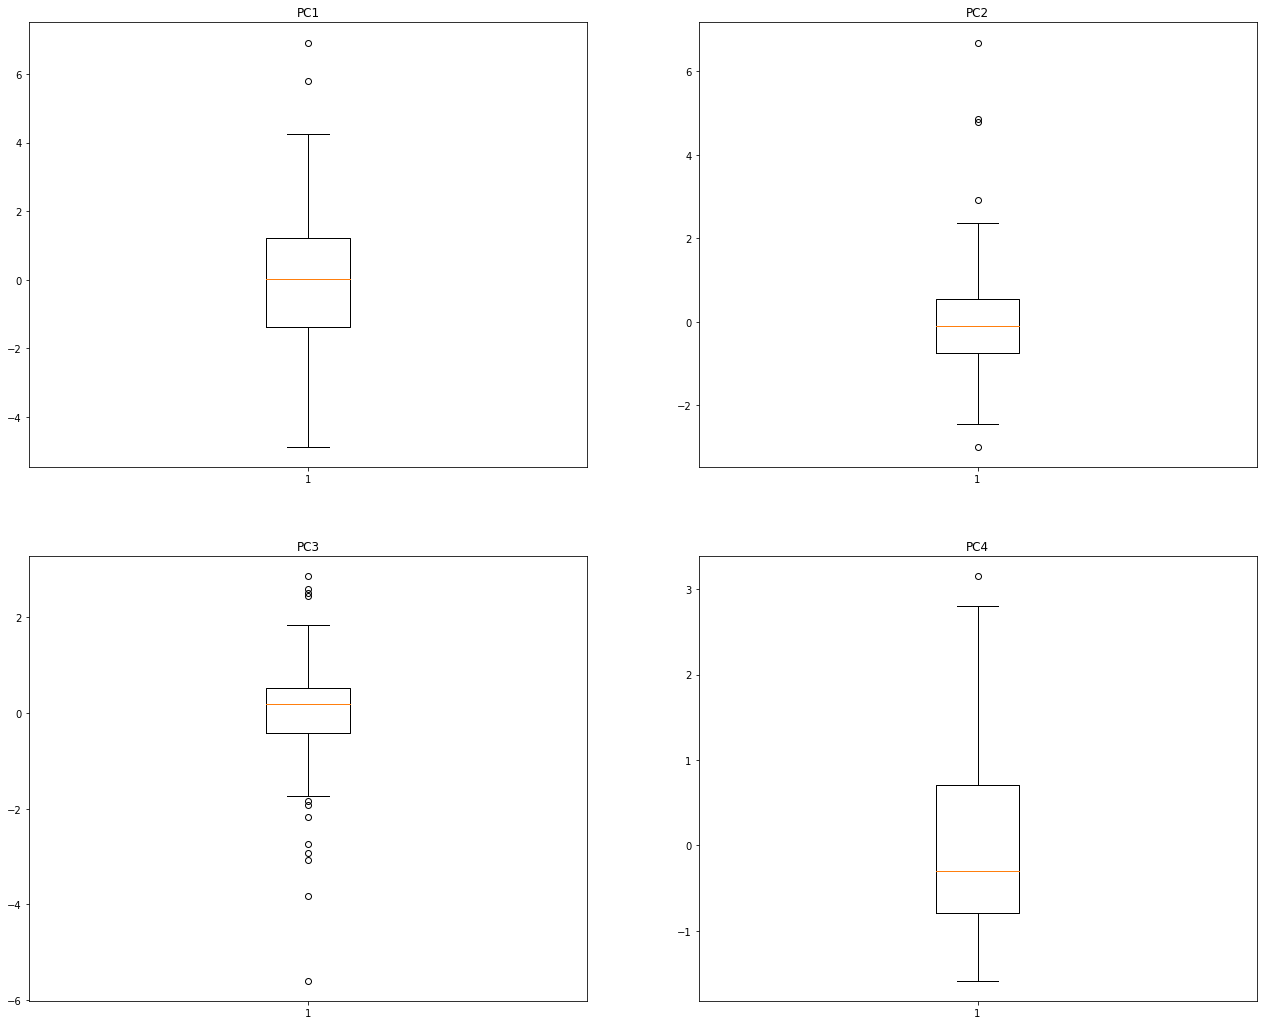

In [1212]:
#Plotting of Outliers
plt.figure(figsize=(22,18))

plt.subplot(2,2,1)
plt.title('PC1')
plt.boxplot(df1['PC1'])
plt.subplot(2,2,2)
plt.title('PC2')
plt.boxplot(df1['PC2'])
plt.subplot(2,2,3)
plt.title('PC3')
plt.boxplot(df1['PC3'])
plt.subplot(2,2,4)
plt.title('PC4')
plt.boxplot(df1['PC4'])

plt.show()

As number of outliers are very less below 5th percentile and above 95th percentile, so we will keep them

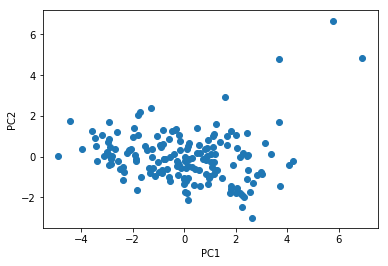

In [1213]:
#visualising the data

plt.scatter(df1["PC1"],df1["PC2"])
plt.ylabel('PC2')
plt.xlabel('PC1')
plt.show()

In [1214]:
#creating correlation matrix for the principal components

corrmat = np.corrcoef(df1.transpose())

In [1215]:
corrmat.shape

(4, 4)

#### Plotting heat map for corr matrix

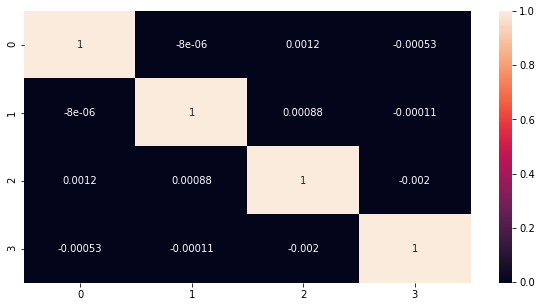

In [1216]:
plt.figure(figsize=[10,5])
sns.heatmap(corrmat, annot=True)

### Inference

From above plot it can be seen that all the diagonal elements are non zero whereas non diagonal elements are almost equal to zero

## Step 5: Clustering

### Hopkins Statistics:
    
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

If the value is between {0.01, ...,0.3}, the data is regularly spaced.

If the value is around 0.5, it is random.

If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [1217]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1218]:
hopkins(df1)

0.8311170414123783

### Inference:
As the value of hopkins statistics is 0.8 , so it has high tendency to form cluster

## Performing K-means clustering

In [1219]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1220]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 3, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

### Finding the optimal number of clusters

### Elbow method/ SSD method


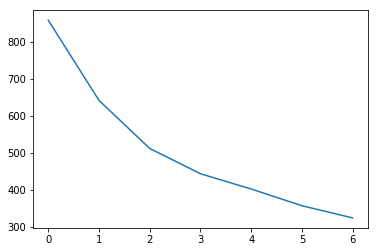

In [1221]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
#ssd
plt.plot(ssd)

### Inference:

From above elbow curve it can be seen that number of cluster that can be used for analysis is ,n=3.

As we go from n=2 to 3, ssd drops very significantly but when we go from 3 to 4 the rate of drop is reduced so n=3 is good number of clusters to go with

As increasing the number of clusters after 3, the rate of drop of ssd value is less.

### Silhouette Analysis


silhouette score = 𝑝−𝑞/𝑚𝑎𝑥(𝑝,𝑞)

𝑝 is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1. 
A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 
A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [1222]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))  
    

For n_clusters=2, the silhouette score is 0.3215604426218601
For n_clusters=3, the silhouette score is 0.3321569691075837
For n_clusters=4, the silhouette score is 0.3557812560970346
For n_clusters=5, the silhouette score is 0.2833998005277045
For n_clusters=6, the silhouette score is 0.2958112013824567
For n_clusters=7, the silhouette score is 0.3088771475396796
For n_clusters=8, the silhouette score is 0.2868013836028227


### Inference:

As seen above, the silhouette score for n=3 is 0.33, and n= 4 is 0.34. 

As there is not much difference in the values so as per Elbow curve method and silhouette analysis , we have n=3 (number of clusters) 

In [1223]:
# final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df1)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [1224]:
#cluster value remain same everytime the kmean cluster code is run

idx = np.argsort(kmeans.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(3)


In [1225]:
kmeans.labels_=lut[kmeans.labels_]

In [1226]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [1227]:
# assign the label
df1['cluster_id'] = kmeans.labels_
df1.head()

,PC1,PC2,PC3,PC4,cluster_id
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,1
2,-0.282988,-0.446657,-1.225135,-0.850127,1
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,1


In [1228]:
#check count of observation per cluster
df1['cluster_id'].value_counts()

1    84
0    47
2    36
Name: cluster_id, dtype: int64

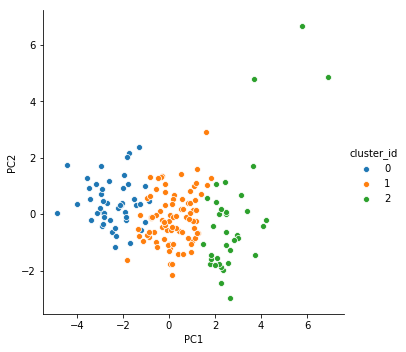

In [1229]:
#visualising the k-means clusters using PC

sns.pairplot(data=df1, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_id", height=5)

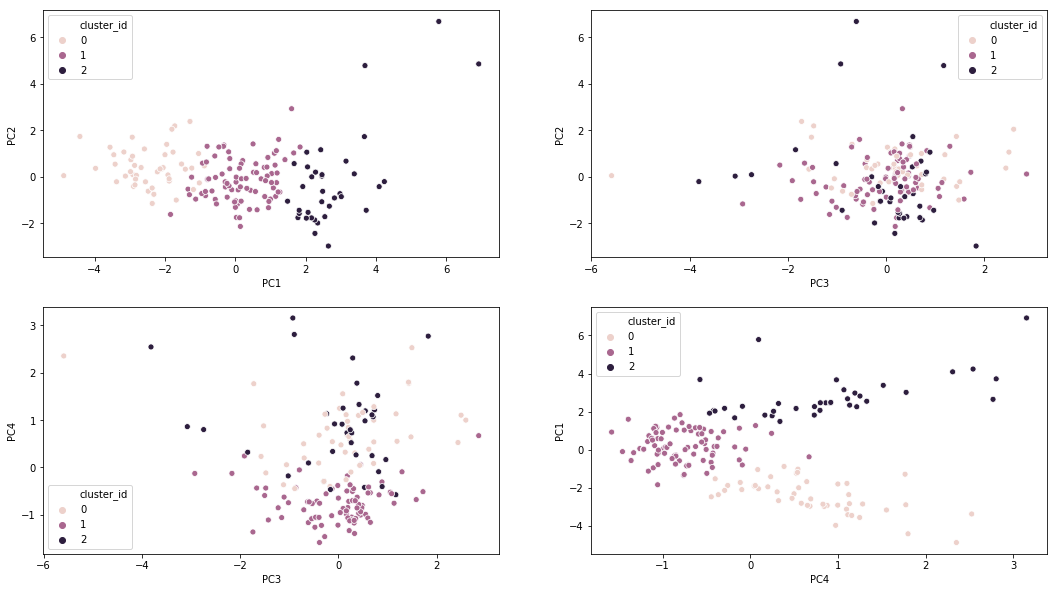

In [1230]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',data=df1)
plt.subplot(2,2,2)
sns.scatterplot(x='PC3',y='PC2',hue='cluster_id',data=df1)
plt.subplot(2,2,3)
sns.scatterplot(x='PC3',y='PC4',hue='cluster_id',data=df1)
plt.subplot(2,2,4)
sns.scatterplot(x='PC4',y='PC1',hue='cluster_id',data=df1)

plt.show()

### Inference:

In K-means clustering, all the three clusters (0,1,2) are well separated and number of countries belong to all the three clusters i.e. 

Cluster1:    84

Cluster0:    47

Cluster2:    36

The plot between PC1 and PC2, PC1 and PC4 is well separated whereas the clusters between PC2 and PC3 , PC3 and PC4 are overlapping.

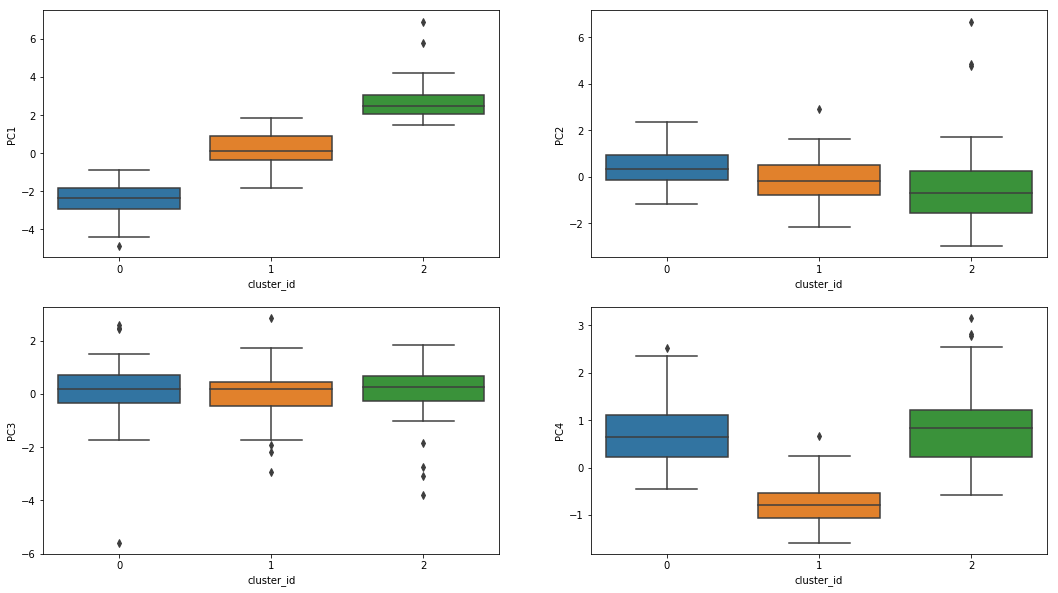

In [1231]:
# plotting of PC with k-mean cluster id

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='PC1', data=df1)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='PC2', data=df1)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='PC3', data=df1)
plt.subplot(2,2,4)
sns.boxplot(x='cluster_id', y='PC4', data=df1)
plt.show()

### Inference:

For PC1, the cluster 2 has high spread in comparison to Cluster 0 and 1

For PC2, cluster 0 has more median than cluster 1 and 2

For PC3, all the clusters have same spread of data

For PC4, Cluster 0 and 2 has high spread of values than cluster 1

# Hierarchical Clustering

In [1232]:
df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


### Single Linkage

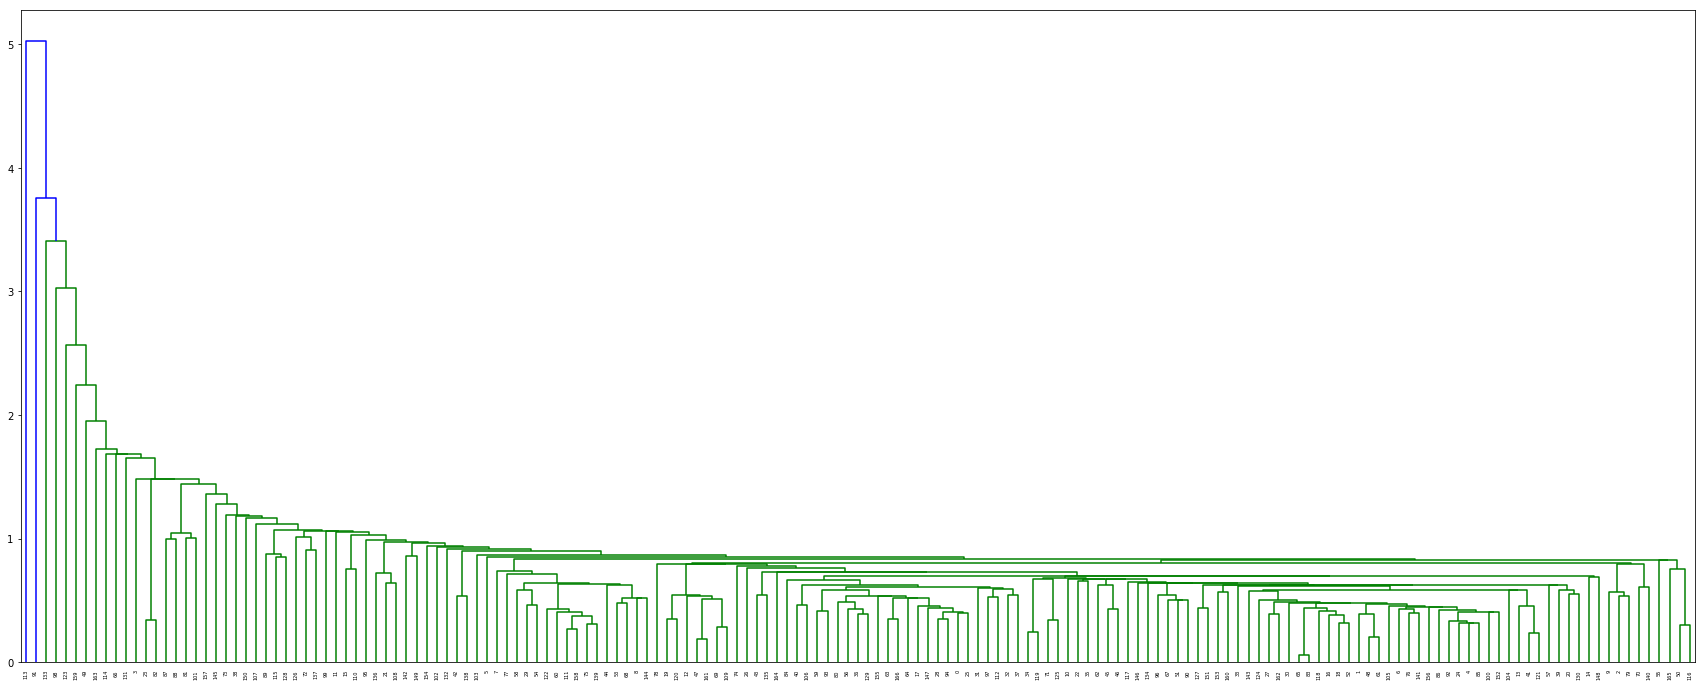

In [1233]:
# single linkage
mergings = linkage(df2, method="single", metric='euclidean')
plt.figure(figsize=(30,12))
dendrogram(mergings)
plt.show()

#### Inference

It can be seen that single linkage doesn't produce a good enough result for us to analyse the clusters. Hence, we need to go ahead and utilise the complete linkage method and then analyse the clusters once again.

### Complete Linkage

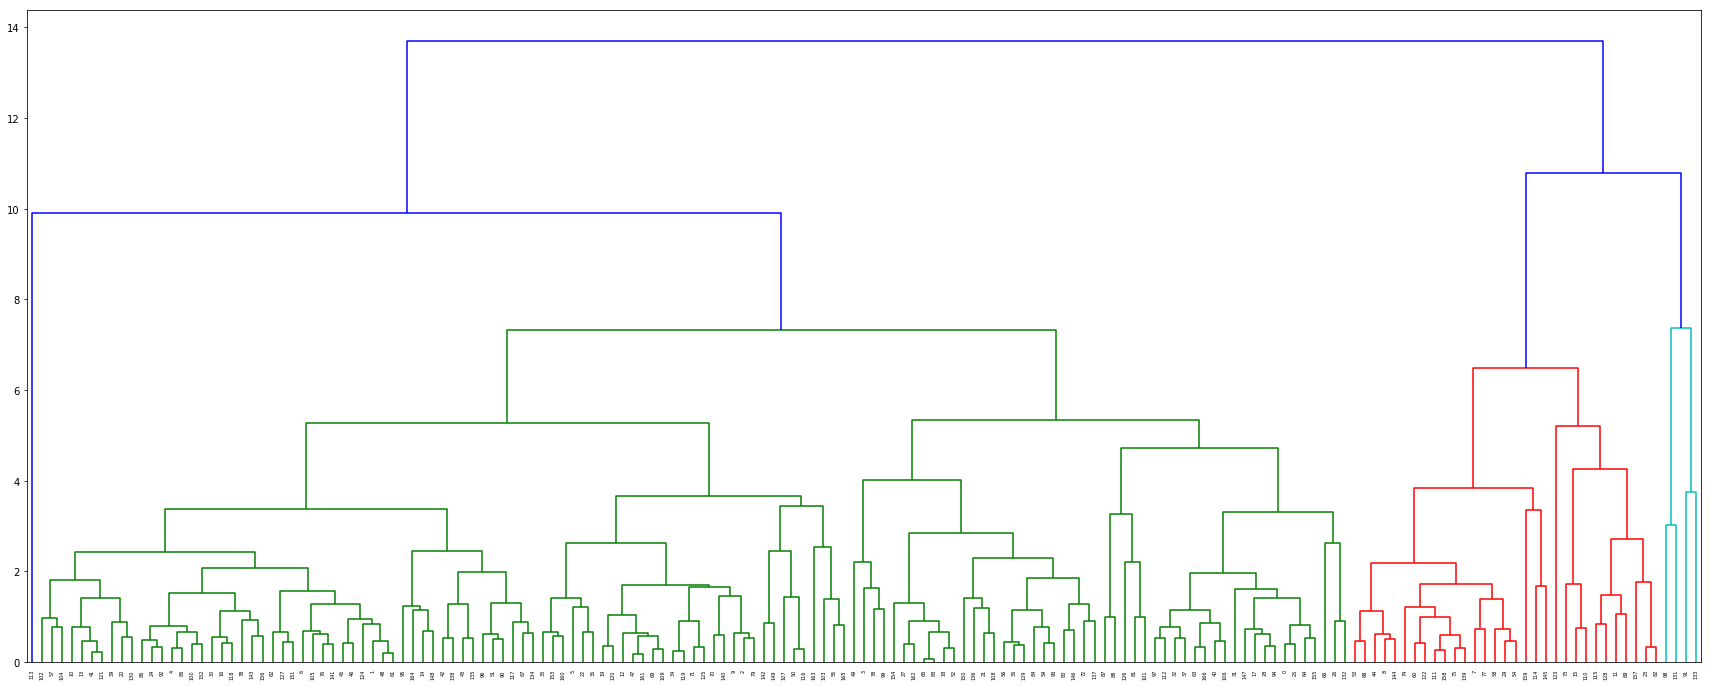

In [1234]:
# complete linkage
plt.figure(figsize=(30,12))
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

### Inference

We can see that complete linkage has a tree like structure

Looking at the dendogram ,cutting at the threshold value of 11 gives 3 clusters.

If we choose 4 clusters, then in 4th cluster there will be only one country and in 3rd cluster there will 4 countries. So we will seclect 3 as number of clusters

In [1235]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [1236]:
# assign cluster labels
df2['cluster_labels'] = cluster_labels
df2.head()

,PC1,PC2,PC3,PC4,cluster_labels
0,-2.913787,0.088354,0.721003,0.996699,0
1,0.429358,-0.587859,0.321052,-1.171193,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,0


In [1237]:
#check count of observation per cluster
df2['cluster_labels'].value_counts()

0    132
1     31
2      4
Name: cluster_labels, dtype: int64

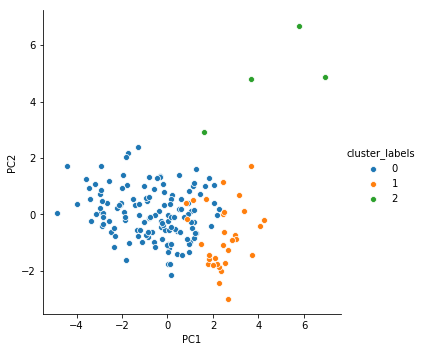

In [1238]:
#visualising the hierarchical clusters using PC

sns.pairplot(data=df2, x_vars=["PC1"], y_vars=["PC2"], hue = "cluster_labels", height=5)

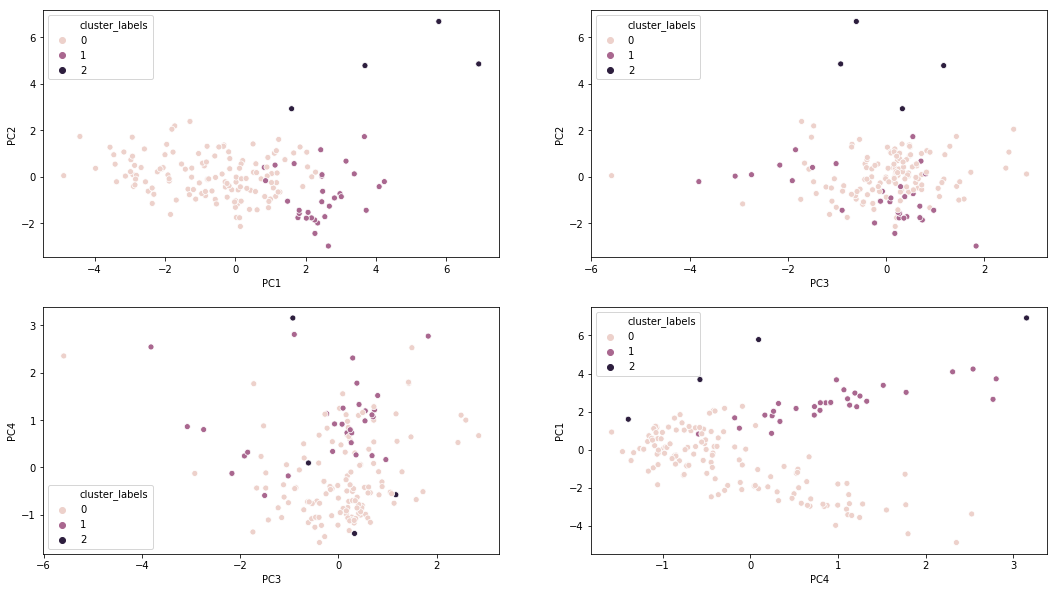

In [985]:
plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.scatterplot(x='PC1',y='PC2',hue='cluster_labels',data=df2)
plt.subplot(2,2,2)
sns.scatterplot(x='PC3',y='PC2',hue='cluster_labels',data=df2)
plt.subplot(2,2,3)
sns.scatterplot(x='PC3',y='PC4',hue='cluster_labels',data=df2)
plt.subplot(2,2,4)
sns.scatterplot(x='PC4',y='PC1',hue='cluster_labels',data=df2)

plt.show()

### Inference:

As seen above in hierarchical clustering , the number of clusters formed are 3, cluster 0 and 1 has more number of countries whereas cluster 2 has only four countries in its category.

Cluster1:    31

Cluster0:    132

Cluster2:    4


The plot between PC1 and PC2, PC1 and PC4 is well separated whereas the clusters between PC2 and PC3 , PC3 and PC4 are overlapping.

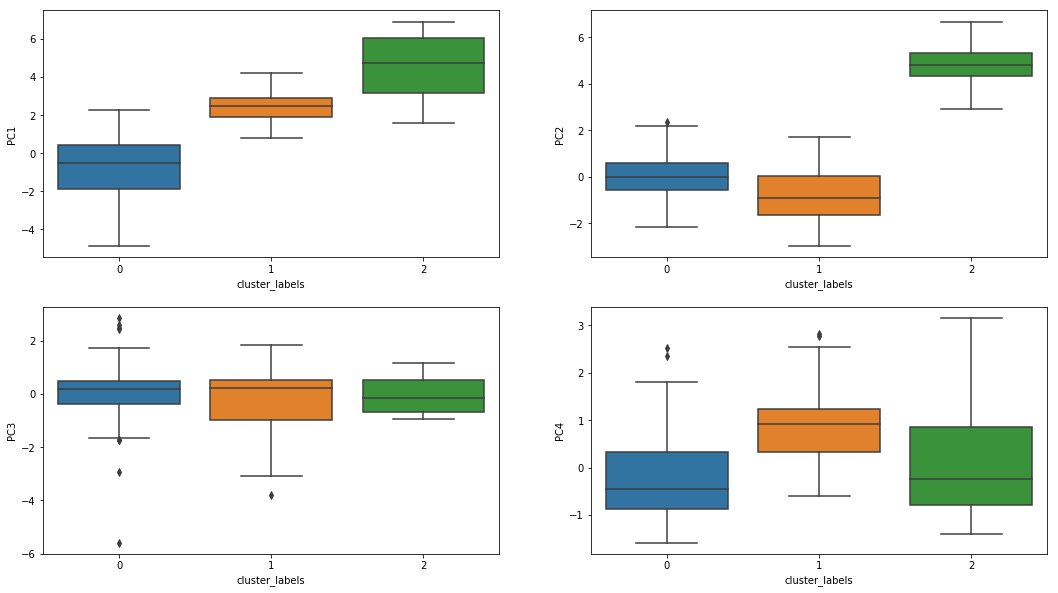

In [832]:
# plotting of PC with hierarchical cluster_labels

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels', y='PC1', data=df2)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels', y='PC2', data=df2)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_labels', y='PC3', data=df2)
plt.subplot(2,2,4)
sns.boxplot(x='cluster_labels', y='PC4', data=df2)
plt.show()

### Inference:

For PC1, the cluster 2 has more spread than cluster 0 and 1

For PC2, cluster 2 has more spread of data whereas cluster 1 has low variation

For PC3, cluster 0,1,2 has almost similar variation in tha data

For, PC4, cluster 1 has high range in comparison to cluster 1 and 2



In [989]:
df2['cluster_id'] = kmeans.labels_
df2.head()

,PC1,PC2,PC3,PC4,cluster_labels,cluster_id
0,-2.913787,0.088354,0.721003,0.996699,0,0
1,0.429358,-0.587859,0.321052,-1.171193,0,1
2,-0.282988,-0.446657,-1.225135,-0.850127,0,1
3,-2.930969,1.699437,-1.521734,0.875966,0,0
4,1.031988,0.130488,0.192922,-0.844808,0,1


## Step 6: Visualisation on the clusters

### Analysis of clusters formed with original variables in df

In [521]:
# As number of clusters are well defined in K-means clustering, so we will go ahead with Kmean clustering for further analysis

In [990]:
X['cluster_id'] = kmeans.labels_
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [991]:
df_final = pd.concat([X, y], axis=1)
df_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,Afghanistan
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,Albania
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,Algeria
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,Angola
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,Antigua and Barbuda


In [1101]:
#join cluster id with original dataframe

data['cluster_id'] = kmeans.labels_
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


### Analysis of Clusters

In [1071]:
data.groupby(['cluster_id']).child_mort.mean()

cluster_id
0    92.961702
1    21.927381
2     5.000000
Name: child_mort, dtype: float64

In [1072]:
data.groupby(['cluster_id']).income.mean()

cluster_id
0     3942.404255
1    12305.595238
2    45672.222222
Name: income, dtype: float64

In [1073]:
data.groupby(['cluster_id']).gdpp.mean()

cluster_id
0     1922.382979
1     6486.452381
2    42494.444444
Name: gdpp, dtype: float64

In [1091]:
# Let's profile the cluster by taking the mean of various attributes

clu_child_mort = pd.DataFrame(data.groupby(['cluster_id']).child_mort.mean())
clu_income= pd.DataFrame(data.groupby(['cluster_id']).income.mean())
clu_gdpp= pd.DataFrame(data.groupby(['cluster_id']).gdpp.mean())


In [1092]:
# Let's concat the resultant with the Cluster ID columns
df3 = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_income,clu_gdpp], axis=1)

In [1093]:
# Let's add column name to it
df3.columns = ["cluster_id","child_mort","income","gdpp"]
df3

,cluster_id,child_mort,income,gdpp
0,0,92.961702,3942.404255,1922.382979
1,1,21.927381,12305.595238,6486.452381
2,2,5.000000,45672.222222,42494.444444


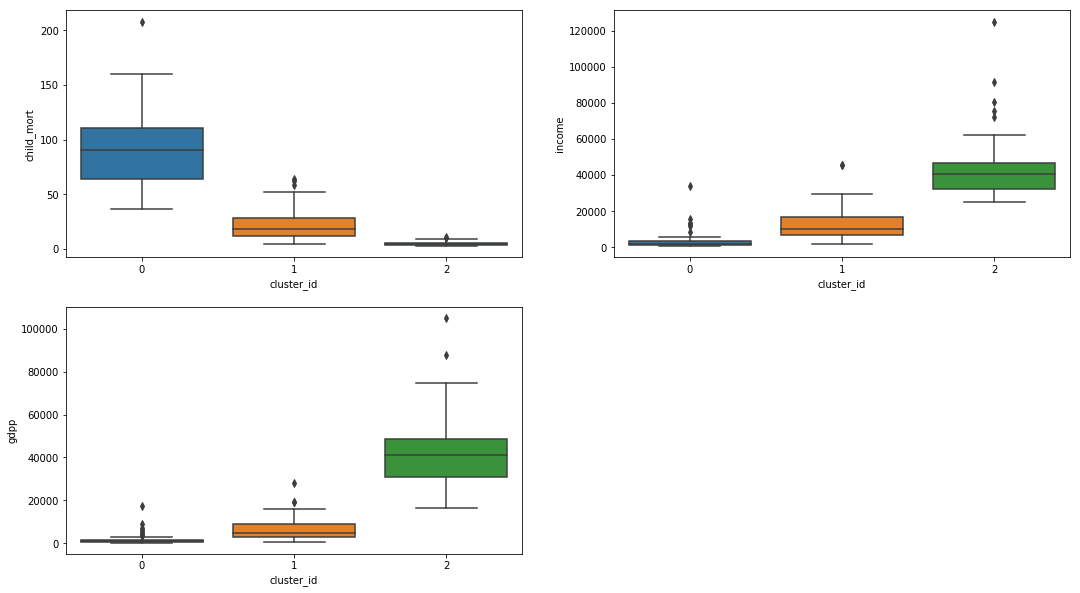

In [1077]:
#Visualising of variables with cluster id from Kmean clustering

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='child_mort', data=data)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='income', data=data)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='gdpp', data=data)

plt.show()

### Inference

1)Cluster 0 has high child mortality rate and low income and low gdpp

2) Cluster 1 has moderate child mortality rate, income and gdpp

3) Cluster 2 has high gdpp and high income and low child mortality rate

Thus cluster 0 belongs to underdeveloped countries(low income, low gdpp and high child mortality rate)

whereas Cluster 2 belongs to developed countries (low child mortality rate, high income and high gdpp)

In [1102]:
#Assigning Hierarchical cluster labels to original df
data['cluster_labels'] = cluster_labels
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


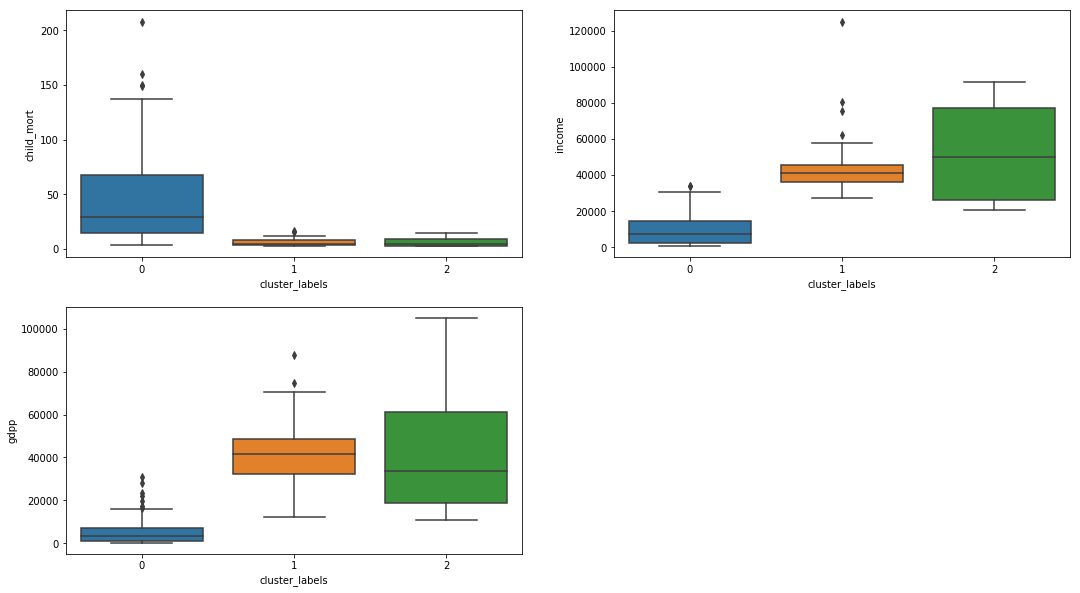

In [1079]:
#Visualising of variables with cluster labels from hierarchical clustering

plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
sns.boxplot(x='cluster_labels', y='child_mort', data=data)
plt.subplot(2,2,2)
sns.boxplot(x='cluster_labels', y='income', data=data)
plt.subplot(2,2,3)
sns.boxplot(x='cluster_labels', y='gdpp', data=data)

plt.show()

### Inference:

Similarly, Cluster 0 has high child mortality rate, low net income per person and low gdpp in comparison to cluster 1 and 2

Thus cluster 1 belongs to developing countries(moderate gdpp,moderate income)

Cluster 2 belongs to developed countries as it has high gdpp, high income and low child mortality rate

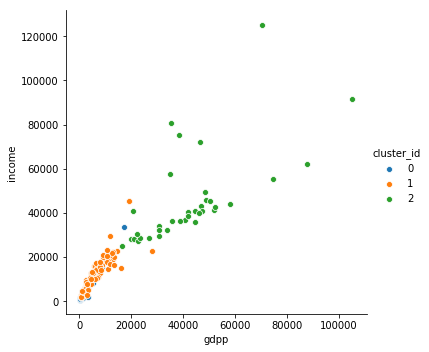

In [1080]:
#visualising the data using variables gdpp and income

sns.pairplot(data=data, x_vars=["gdpp"], y_vars=["income"], hue = "cluster_id", size=5)

### Inference:

It is observed that cluster 0 has low income and low gdpp whereas cluster 2 has high income and high gdpp whereas cluster 1 has moderate income and moderate gdpp

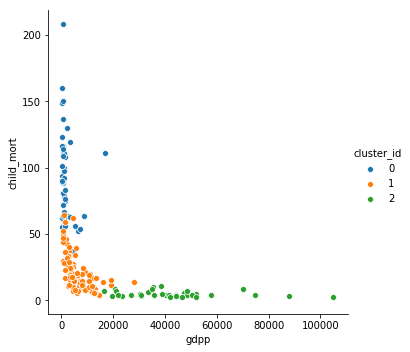

In [1081]:
#visualising the data using variables gdpp and child_mort

sns.pairplot(data=data, x_vars=["gdpp"], y_vars=["child_mort"], hue = "cluster_id", size=5)

### Inference:

It is observed that cluster 0 has high child mortality rate, low gdpp whereas cluster 2 has high gdpp and low mortality rate and cluster 1 has moderate values

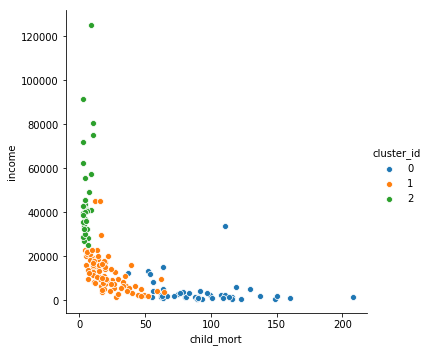

In [1082]:
#visualising the data using variables child_mort and income

sns.pairplot(data=data, x_vars=["child_mort"], y_vars=["income"], hue = "cluster_id", size=5)

### Inference:

It is observed that cluster 0 has high child mortality rate, low income whereas cluster 2 has high income and low mortality rate and cluster 1 has moderate values

## Step 7: Finding the observations that belong to certain cluster


In [669]:
# As number of clusters are well defined in K-means clustering, so we will go ahead with Kmean clustering for further analysis

In [1103]:
cluster0=data[data["cluster_id"]==0]
cluster1=data[data["cluster_id"]==1]
cluster2=data[data["cluster_id"]==2]

In [1104]:
print(" Under developed countries are as follows:")
cluster0["country"]

 Under developed countries are as follows:


0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106     

In [1105]:
print(" Developing countries are as follows:")
cluster1["country"]

 Developing countries are as follows:


1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
10                            Bahamas
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47                              Egypt
48          

In [1106]:
print(" Developed countries are as follows:")
cluster2["country"]

 Developed countries are as follows:


7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
42                   Cyprus
43           Czech Republic
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
122                Portugal
123                   Qatar
133               Singapore
134         Slovak Republic
135                Slovenia
138             South Korea
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United

In [851]:
# Five countries which are in direst need of aid 
#on sorting the values of  highest mortality rate, lowest gdpp and lowest income

In [1107]:
data=data.sort_values(by="income", ascending= True)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0,0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.10,58.0,5.34,648,0,0
150,Togo,90.3,40.20,7.65,57.3,1210,1.18,58.7,4.87,488,0,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0,0


In [1108]:
data=data.sort_values(by="gdpp", ascending= True)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,0,0
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413,0,0
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459,0,0
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482,0,0


In [1109]:
data=data.sort_values(by="child_mort", ascending= False)
data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,15.3,6.91,64.7,1500,5.45,32.1,3.33,662,0,0
132,Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399,0,0
32,Chad,150.0,36.8,4.53,43.5,1930,6.39,56.5,6.59,897,0,0
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446,0,0
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,0,0
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.00,60.5,5.84,2330,0,0
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,0,0
25,Burkina Faso,116.0,19.2,6.74,29.6,1430,6.81,57.9,5.87,575,0,0


# RECOMMENDATION

1) Cluster with cluster_id 2 are the developed countries(high income, high gdpp, low child mortality)

2) Cluster with cluster_id 1 are the developing countries(medium income, medium gdpp, low child mortality)

3) Cluster with cluster_id 0 are the under-developed or backward countries(low income, low gdpp, high child mortality)

4) 5 countries which are in direst need of aid ( from cluster 0) are as follow:
    
    i)Congo,Dem.Rep
    ii)Niger
    iii)Sierra Leone
    iv)Liberia
    v)Burundi
    vi)Central African Republic
    vii)Haiti
    